<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Dataframe & Python

### LAP Parte 2: “Cookbook"

https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook

Sugestão: Colocar a página do Cookbook lado a lado com este notebook para realizar as operações.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.show_versions()

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.10.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 6.1.58+
Version          : #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 2.0.3
numpy            : 1.25.2
pytz             : 2023.4
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.1.2
Cython           : 3.0.10
pytest           : 7.4.4
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.4
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.9
jinja2           : 3.1.3
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.12.3
bottleneck       : None

#Idioms

In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [ ]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


#If-Then

In [ ]:
df.loc[df.AAA >= 5, "BBB"] = -1

In [ ]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [ ]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555

In [ ]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [ ]:
df.loc[df.AAA < 5, ["BBB", "CCC"]] = 2000

In [ ]:
df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [ ]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)

In [ ]:
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


In [ ]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [ ]:
df["logic"] = np.where(df["AAA"] > 5, "high", "low")

In [ ]:
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


## Splitting

In [ ]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [ ]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [193]:
df[df.AAA <= 5]

AttributeError: 'DataFrame' object has no attribute 'AAA'

In [194]:
df[df.AAA > 5]

AttributeError: 'DataFrame' object has no attribute 'AAA'

##Building criteria


In [195]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [196]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [197]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

In [198]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [199]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999


In [200]:
df

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


In [201]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [202]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [203]:
aValue = 43.0


In [204]:
df.loc[(df.CCC - aValue).abs().argsort()]


,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


In [205]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

In [206]:
df


,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [207]:
Crit1 = df.AAA <= 5.5

In [208]:
Crit2 = df.BBB == 10.0

In [209]:
Crit3 = df.CCC > -40.0

In [210]:
AllCrit = Crit1 & Crit2 & Crit3

In [211]:
import functools

In [212]:
CritList = [Crit1, Crit2, Crit3]

In [213]:
AllCrit = functools.reduce(lambda x, y: x & y, CritList)

In [214]:
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


#Selection

##Dataframes

In [215]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


In [216]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [218]:
df[((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


In [220]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)


In [221]:
df.loc["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [222]:
df[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [223]:
df["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [224]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

In [225]:
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])

In [226]:

df2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [227]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [228]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


In [229]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [230]:
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


##New columns


In [231]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

In [232]:
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [233]:
source_cols =df.columns

In [234]:
new_cols=[str(x) + "_cat" for x in source_cols]

In [235]:
categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}

In [236]:
df[new_cols] = df[source_cols].map(categories.get)


AttributeError: 'DataFrame' object has no attribute 'map'

In [237]:
df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [238]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)


In [239]:
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [240]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [241]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()


,AAA,BBB
0,1,1
1,2,1
2,3,2


#Multiindexing

In [242]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)

In [243]:
df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [244]:
df = df.set_index("row")

In [245]:
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [246]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])

In [247]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [249]:
df = df.stack(0, future_stack=True).reset_index(1)

TypeError: DataFrame.stack() got an unexpected keyword argument 'future_stack'

In [250]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [251]:
df.columns = ["Sample", "All_X", "All_Y"]

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [252]:
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

#Arithmetic

In [253]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)

In [254]:
df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)

In [255]:
df

A                   B                   C          
          O         I         O         I         O         I
n  1.261072 -0.770580 -0.344226 -0.358407 -0.169787 -0.098891
m  0.463110  0.692148  0.263747  0.133091  0.843084 -1.379283

In [256]:
df = df.div(df["C"], level=1)

In [257]:
df

A                   B              C     
          O         I         O         I    O    I
n -7.427379  7.792232  2.027399  3.624273  1.0  1.0
m  0.549305 -0.501817  0.312836 -0.096493  1.0  1.0

#Slicing

In [258]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

In [259]:
index = pd.MultiIndex.from_tuples(coords)

In [260]:
df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

In [261]:
df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

 Note : level and axis are optional, and default to zero

In [262]:
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


In [263]:
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


Slicing a MultiIndex with xs, method #2

In [264]:
import itertools

In [265]:
index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

In [266]:
headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

In [267]:
indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

In [268]:
cols = pd.MultiIndex.from_tuples(headr)

In [269]:
data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

In [270]:
df = pd.DataFrame(data, indx, cols)

In [271]:
df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [272]:
All = slice(None)

In [273]:
df.loc["Violet"]

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [274]:
df.loc[(All, "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [275]:
df.loc[(slice("Ada", "Quinn"), "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [276]:
df.loc[(All, "Math"), ("Exams")]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [277]:
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


#Sorting

In [278]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

##Levels

#Missing data

In [279]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)

In [280]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)

In [281]:
df

,A
2013-08-01,0.112383
2013-08-02,-0.875309
2013-08-05,-0.417397
2013-08-06,-1.575770
2013-08-07,1.324677
2013-08-08,-0.356403


In [282]:
df.bfill()

,A
2013-08-01,0.112383
2013-08-02,-0.875309
2013-08-05,-0.417397
2013-08-06,-1.575770
2013-08-07,1.324677
2013-08-08,-0.356403


##Replace

#Grouping

In [283]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

In [284]:
df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [285]:
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()], include_groups=False)

TypeError: <lambda>() got an unexpected keyword argument 'include_groups'

In [46]:
gb = df.groupby("animal")

In [47]:
gb = df.groupby("animal")

In [48]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])

In [49]:
expected_df = gb.apply(GrowUp, include_groups=False)


TypeError: GrowUp() got an unexpected keyword argument 'include_groups'

In [50]:
expected_df

NameError: name 'expected_df' is not defined

In [51]:
S = pd.Series([i / 100.0 for i in range(1, 11)])

In [52]:
S = pd.Series([i / 100.0 for i in range(1, 11)])

In [53]:
def red(x):
    return functools.reduce(cum_ret, x, 1.0)

In [54]:
S.expanding().apply(red, raw=True)

NameError: name 'functools' is not defined

In [55]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})

In [56]:
gb = df.groupby("A")

In [57]:
def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())

In [58]:
gb.transform(replace)

,B
0,1
1,1
2,1
3,2


In [59]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)

In [60]:
code_groups = df.groupby("code")


In [61]:
agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")


In [62]:
sorted_df = df.loc[agg_n_sort_order.index]

In [63]:
sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [64]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")

In [65]:
ts = pd.Series(data=list(range(10)), index=rng)

In [66]:
def MyCust(x):
    if len(x) > 2:
        return x.iloc[1] * 1.234
    return pd.NaT

In [67]:
mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}

In [68]:
ts.resample("5min").apply(mhc)

,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [69]:
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [70]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

In [71]:
df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [72]:
df["Counts"] = df.groupby(["Color"]).transform(len)


In [73]:
df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [74]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)

In [75]:
df

,line_race,beyer
Last Gunfighter,10,99
Last Gunfighter,10,102
Last Gunfighter,8,103
Paynter,10,103
Paynter,10,88
Paynter,8,100


In [76]:
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)

In [77]:
df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


In [78]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])


In [79]:
mask = df.groupby(level=0).agg("idxmax")

In [80]:
df_count = df.loc[mask["no"]].reset_index()

In [81]:
df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [82]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])

In [84]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups

{1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

In [85]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

#Expanding data

#Splitting

In [86]:
df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)

In [87]:
dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]


In [88]:
dfs[0]

,Case,Data
0,A,-0.093962
1,A,-0.777676
2,A,2.166074
3,B,-0.410493


In [89]:
dfs[1]

,Case,Data
4,A,0.221779
5,A,1.602663
6,B,0.371657


In [90]:
dfs[2]

,Case,Data
7,A,-1.029554
8,A,1.352244


##Pivot

In [91]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

In [92]:
table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)

In [93]:
table.stack("City", future_stack=True)

TypeError: DataFrame.stack() got an unexpected keyword argument 'future_stack'

In [94]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

In [95]:
df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)

In [96]:
df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [97]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="ME", periods=36),
)

ValueError: Invalid frequency: ME

In [98]:
pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)

AttributeError: 'RangeIndex' object has no attribute 'month'

##Apply

In [99]:
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)

In [100]:
def SeriesFromSubList(aList):
    return pd.Series(aList)

In [101]:
df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

In [102]:
df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

In [103]:
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)

In [104]:
df

,A,B
2001-01-01,-0.000168,0.000244
2001-01-02,0.000038,0.000106
2001-01-03,0.000004,-0.000081
2001-01-04,-0.000127,0.000057
2001-01-05,0.000038,0.000142
...,...,...
2006-06-19,-0.000160,-0.000073
2006-06-20,0.000098,0.000007
2006-06-21,-0.000061,-0.000144
2006-06-22,-0.000005,0.000051


In [105]:
def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]

In [106]:
s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)

In [107]:
s

2001-01-01   -0.001792
2001-01-02   -0.003283
2001-01-03   -0.004067
2001-01-04   -0.003345
2001-01-05   -0.003584
                ...   
2006-04-30   -0.005497
2006-05-01   -0.005019
2006-05-02   -0.006494
2006-05-03   -0.005723
2006-05-04   -0.005662
Length: 1950, dtype: float64

In [108]:
rng = pd.date_range(start="2014-01-01", periods=100)

In [109]:
df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)

In [110]:
df

,Open,Close,Volume
2014-01-01,-0.129152,0.290072,122
2014-01-02,-0.081738,-0.003431,1518
2014-01-03,-1.473114,-0.319605,966
2014-01-04,-2.194908,-0.267506,663
2014-01-05,-0.655621,0.224652,881
...,...,...,...
2014-04-06,-0.641710,0.027469,1862
2014-04-07,0.231206,0.802772,1144
2014-04-08,0.652681,1.443737,319
2014-04-09,-0.687234,0.270740,829


In [111]:
def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()

In [112]:
window = 5

In [113]:
s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)

In [114]:
s.round(2)

2014-01-06   -0.06
2014-01-07    0.05
2014-01-08    0.06
2014-01-09    0.19
2014-01-10    0.27
              ... 
2014-04-06   -0.49
2014-04-07   -0.48
2014-04-08   -0.30
2014-04-09   -0.11
2014-04-10    0.43
Length: 95, dtype: float64

#Timeseries

In [115]:
dates = pd.date_range("2000-01-01", periods=5)

In [116]:
dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

#Resampling

##Merge

In [117]:
rng = pd.date_range("2000-01-01", periods=6)

In [118]:
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

In [119]:
df2 = df1.copy()

In [120]:
df = pd.concat([df1, df2], ignore_index=True)

In [121]:
df

,A,B,C
0,-0.758473,0.382466,-1.399155
1,-2.416139,-0.084328,0.604970
2,0.201618,0.079927,0.055291
3,-1.124701,0.859382,-0.019995
4,1.471030,-0.882616,-0.445796
5,0.302756,-2.081110,1.018679
6,-0.758473,0.382466,-1.399155
7,-2.416139,-0.084328,0.604970
8,0.201618,0.079927,0.055291
9,-1.124701,0.859382,-0.019995


In [122]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

In [123]:
df

,Area,Bins,Test_0,Data
0,A,110,0,1.597997
1,A,110,1,-1.243233
2,A,160,0,-0.303421
3,A,160,1,-0.735559
4,A,160,2,-0.158058
5,C,40,0,0.371975
6,C,40,1,-0.446155


In [124]:
df["Test_1"] = df["Test_0"] - 1

In [125]:
pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,1.597997,-1,1,-1.243233,0
1,A,160,0,-0.303421,-1,1,-0.735559,0
2,A,160,1,-0.735559,0,2,-0.158058,1
3,C,40,0,0.371975,-1,1,-0.446155,0


#Plotting

In [126]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)

In [127]:
df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)

<Axes: title={'center': 'price'}, xlabel='quartiles'>

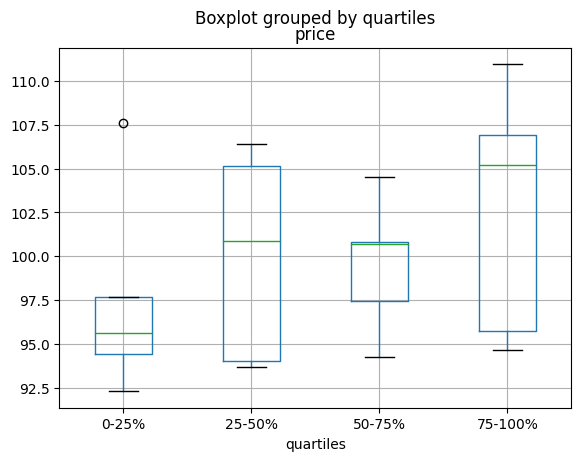

In [128]:
df.boxplot(column="price", by="quartiles")

#Data in/out

##CSV

###Reading multiple files to create a single DataFrame

In [129]:
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))

In [130]:
files = ["file_0.csv", "file_1.csv", "file_2.csv"]

In [131]:
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [132]:
import glob

In [133]:
import os

In [134]:
files = glob.glob("file_*.csv")

In [135]:
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

###Parsing date components in multi-columns

In [136]:
i = pd.date_range("20000101", periods=10000)

In [137]:
df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

In [138]:
df.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [139]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
%timeit pd.to_datetime(ds)

7.44 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.88 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


###Skip row between header and data

In [140]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

###Option 1: pass rows explicitly to skip rows

In [141]:
from io import StringIO


In [142]:
pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


###Option 2: read column names and then data

In [143]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [144]:
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns


In [145]:
pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


#SQL

##Excel

##HTML

##HDFStore

In [146]:
df = pd.DataFrame(np.random.randn(8, 3))

In [147]:
store = pd.HDFStore("test.h5")

In [148]:
store.put("df", df)

In [149]:
store.get_storer("df").attrs.my_attribute = {"A": 10}

In [150]:
store.get_storer("df").attrs.my_attribute

{'A': 10}

In [151]:
store = pd.HDFStore("test.h5", "w", driver="H5FD_CORE")

ValueError: The file 'test.h5' is already opened.  Please close it before reopening in write mode.

In [152]:
df = pd.DataFrame(np.random.randn(8, 3))

In [153]:
store["test"] = df

###Binary files

#Computation

##Correlation

In [156]:
df = pd.DataFrame(np.random.random(size=(100, 5)))

In [157]:
corr_mat = df.corr()

In [158]:
mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)

In [159]:
corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,-0.045989,NaN,NaN,NaN,NaN
2,-0.192891,0.125244,NaN,NaN,NaN
3,0.014346,-0.076389,0.037683,NaN,NaN
4,-0.145843,-0.043533,-0.018476,0.023619,NaN


In [160]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b


In [161]:
df = pd.DataFrame(np.random.normal(size=(100, 3)))

In [162]:
df.corr(method=distcorr)

,0,1,2
0,1.000000,0.133432,0.118960
1,0.133432,1.000000,0.174762
2,0.118960,0.174762,1.000000


#Timedeltas

In [163]:
import datetime

In [164]:
s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))


In [165]:
s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [166]:
s.max() - s

0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [167]:
s - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [168]:
s + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [169]:
datetime.datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [170]:
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [171]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])



In [172]:
df = pd.DataFrame({"A": s, "B": deltas})

In [173]:
df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [175]:
df["New Dates"] = df["A"] + df["B"]

In [176]:
df["Delta"] = df["A"] - df["New Dates"]

In [177]:
df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [178]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

In [179]:
y = s - s.shift()

In [180]:
y

0      NaT
1   1 days
2   1 days
dtype: timedelta64[ns]

In [181]:
y[1] = np.nan

In [182]:
y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

#Creating example data

In [183]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())


In [186]:
df = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)

NameError: name 'itertools' is not defined

In [185]:
df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


#Constant series

In [187]:
v = s.to_numpy()

In [188]:
is_constant = v.shape[0] == 0 or (s[0] == s).all()

In [189]:
v = s.dropna().to_numpy()


In [190]:
is_constant = v.shape[0] == 0 or (s[0] == s).all()